In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
vinos = pd.read_csv('datasetvinos.csv', engine='python')
print(vinos.info())
print(vinos.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Vino             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
   Vino  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  

In [3]:
vinos_variables = vinos.drop(['Vino'], axis=1) # Eliminamos la columna vino pues no es reelenvante para el clustering
print(vinos_variables.describe()) 

          Alcohol       Malic         Ash  Alcalinity   Magnesium     Phenols  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean    13.000618    2.336348    2.366517   19.494944   99.741573    2.295112   
std      0.811827    1.117146    0.274344    3.339564   14.282484    0.625851   
min     11.030000    0.740000    1.360000   10.600000   70.000000    0.980000   
25%     12.362500    1.602500    2.210000   17.200000   88.000000    1.742500   
50%     13.050000    1.865000    2.360000   19.500000   98.000000    2.355000   
75%     13.677500    3.082500    2.557500   21.500000  107.000000    2.800000   
max     14.830000    5.800000    3.230000   30.000000  162.000000    3.880000   

       Flavanoids  Nonflavanoids  Proanthocyanins       Color         Hue  \
count  178.000000     178.000000       178.000000  178.000000  178.000000   
mean     2.029270       0.361854         1.590899    5.058090    0.957449   
std      0.998859       0.124453       

In [4]:
vinos_normalizados = (vinos_variables - vinos_variables.min()) / (vinos_variables.max() - vinos_variables.min()) # Dejar los valores normalizados en rangos de 0 a 1

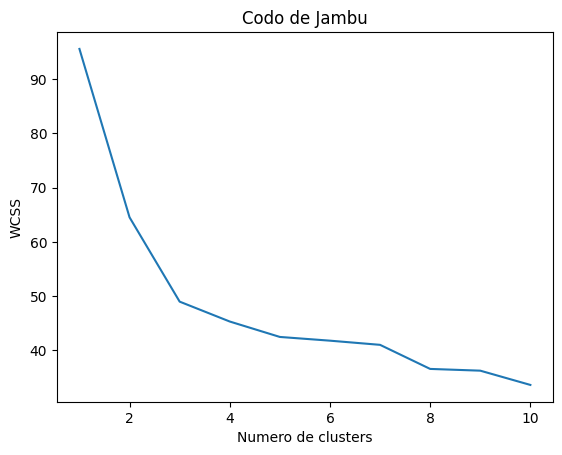

In [5]:
wcss = [] # Suma de los cuadrados de las distancias de los puntos a los centroides
for i in range(1, 11): # Numero de clusters a probar, en este caso de 1 a 10
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(vinos_normalizados)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Codo de Jambu')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show() # Se selecciona la cantidad de clusters donde la curva se empieza a aplanar

In [6]:
clustering = KMeans(n_clusters=3, max_iter=300)
clustering.fit(vinos_normalizados)
# Los resultados del clustering se guardan en la columna KMeans_Clusters
print('CLUSTERS')
vinos['KMeans_Clusters'] = clustering.labels_
print(vinos.head())

CLUSTERS
   Vino  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     2    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     3    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     4    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     5    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0           0.28             2.29   5.64  1.04      3.92     1065   
1           0.26             1.28   4.38  1.05      3.40     1050   
2           0.30             2.81   5.68  1.03      3.17     1185   
3           0.24             2.18   7.80  0.86      3.45     1480   
4           0.39             1.82   4.32  1.04      2.93      735   

   KMeans_Clusters  
0                2  
1                2  
2                2  
3                2  
4       

In [7]:
# visualizacion de los clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Reducir las dimensiones de los datos a 2
pca_vinos = pca.fit_transform(vinos_normalizados) # Aplicar PCA a los datos normalizados
pca_vinos_df = pd.DataFrame(data=pca_vinos, columns=['Componente1', 'Componente2']) # Crear un dataframe con los datos de PCA
pca_nombres_vinos = pd.concat([pca_vinos_df, vinos[['KMeans_Clusters']]], axis=1)

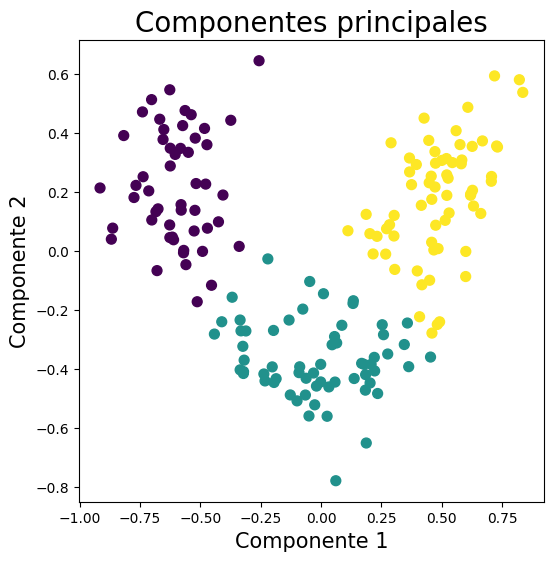

In [8]:
# Graficar los clusters
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Componente 1', fontsize=15)
ax.set_ylabel('Componente 2', fontsize=15)
ax.set_title('Componentes principales', fontsize=20)
colores = ['blue', 'red', 'green']
ax.scatter(x=pca_nombres_vinos['Componente1'], y=pca_nombres_vinos['Componente2'], c=pca_nombres_vinos['KMeans_Clusters'], cmap='viridis', s=50)
plt.show()


